In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


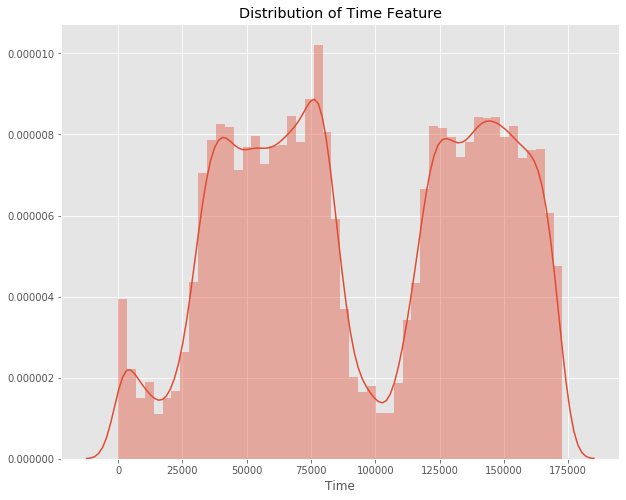

In [8]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

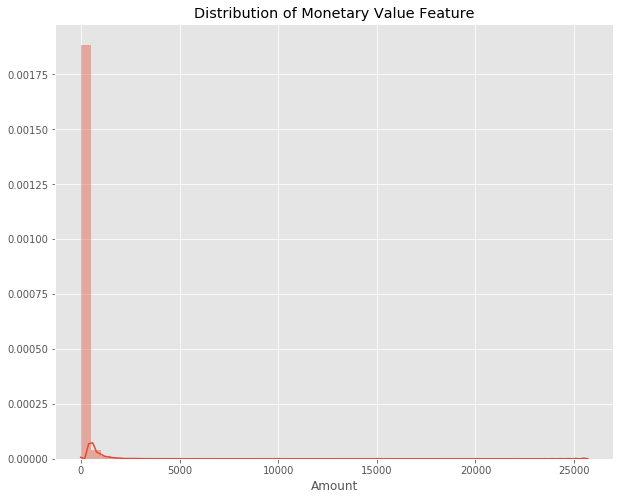

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [10]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

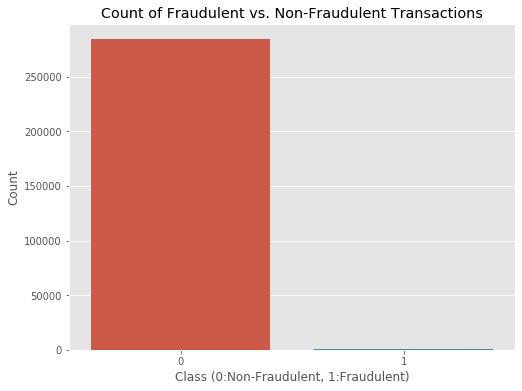

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [12]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,3.777e-12,-2.120e-12,-1.724e-13,-3.473e-12,-1.307e-13,-1.127e-13,2.115e-12,3.082e-14,...,-3.276e-12,2.282e-12,-2.972e-12,-1.030e-12,1.147e-12,1.835e-12,7.625e-12,-9.775e-13,-2.277e-01,-1.013e-01
V2,-0.011,3.777e-12,1.000e+00,2.327e-12,-2.315e-12,-1.833e-12,9.440e-13,5.403e-12,2.153e-14,3.239e-13,...,2.281e-12,-2.546e-13,-4.856e-12,6.431e-13,-9.428e-13,-4.129e-13,-9.858e-13,2.525e-12,-5.314e-01,9.129e-02
V3,-0.420,-2.120e-12,2.327e-12,1.000e+00,2.037e-13,-4.032e-12,-1.583e-13,3.405e-12,-1.272e-12,-6.820e-13,...,6.736e-13,-8.922e-13,4.147e-12,3.408e-12,5.718e-13,-2.577e-12,-5.042e-12,5.189e-12,-2.109e-01,-1.930e-01
V4,-0.105,-1.724e-13,-2.315e-12,2.037e-13,1.000e+00,-2.550e-13,1.084e-12,8.130e-13,7.338e-13,-7.138e-13,...,-2.696e-12,4.344e-13,-4.161e-12,-2.369e-12,1.620e-12,-3.045e-13,-1.456e-12,-2.832e-12,9.873e-02,1.334e-01
V5,0.173,-3.473e-12,-1.833e-12,-4.032e-12,-2.550e-13,1.000e+00,-6.988e-14,1.574e-11,-2.038e-12,-1.000e-12,...,-1.752e-12,7.098e-13,3.616e-12,-2.809e-13,1.452e-12,-1.896e-13,-2.125e-12,1.010e-11,-3.864e-01,-9.497e-02
V6,-0.063,-1.307e-13,9.440e-13,-1.583e-13,1.084e-12,-6.988e-14,1.000e+00,-2.799e-12,-5.446e-13,2.037e-12,...,1.477e-12,-1.145e-12,-1.528e-12,1.552e-12,-2.724e-12,3.351e-12,1.481e-12,-6.072e-13,2.160e-01,-4.364e-02
V7,0.085,-1.127e-13,5.403e-12,3.405e-12,8.130e-13,1.574e-11,-2.799e-12,1.000e+00,5.529e-12,5.086e-13,...,2.788e-12,-8.134e-13,-4.292e-12,-2.554e-12,-7.410e-13,-4.476e-12,-1.329e-11,2.956e-13,3.973e-01,-1.873e-01
V8,-0.037,2.115e-12,2.153e-14,-1.272e-12,7.338e-13,-2.038e-12,-5.446e-13,5.529e-12,1.000e+00,-2.243e-12,...,-4.022e-12,-2.680e-12,9.013e-13,-1.074e-12,-3.269e-12,1.044e-12,-3.500e-12,1.867e-12,-1.031e-01,1.988e-02
V9,-0.009,3.082e-14,3.239e-13,-6.820e-13,-7.138e-13,-1.000e-12,2.037e-12,5.086e-13,-2.243e-12,1.000e+00,...,3.040e-12,-7.470e-13,-1.011e-12,8.577e-13,-1.589e-12,-7.738e-13,2.429e-12,-1.406e-12,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

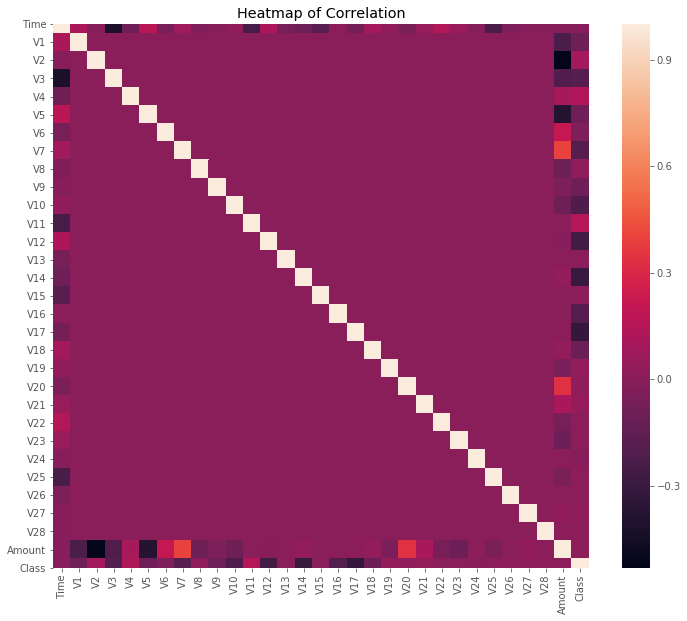

In [13]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [14]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

# Scaling Amount and Time

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [16]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [17]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
202018,134137.0,1.955,-0.411,-1.665,0.186,1.947,3.969,-1.128,1.051,0.743,...,0.181,0.687,-0.048,-0.540,0.078,-0.037,1.00,0,-0.349,0.828
54736,46594.0,-0.272,-3.098,-0.069,0.324,-1.180,2.042,-0.212,0.556,-0.622,...,-0.263,-1.038,-0.565,0.232,-0.064,0.121,715.99,0,2.509,-1.015
30082,35765.0,-1.292,1.325,1.126,1.283,0.474,0.400,0.377,0.250,-0.573,...,0.075,-0.389,-0.289,-0.486,-0.893,-0.213,0.00,0,-0.353,-1.243
19147,30048.0,-0.472,0.297,1.638,0.395,-0.879,1.062,-0.785,0.953,0.925,...,-0.052,-0.454,-0.314,0.317,-0.039,-0.034,22.98,0,-0.261,-1.364
211811,138582.0,1.943,-0.080,-1.891,0.395,0.220,-1.028,0.152,-0.177,0.519,...,-0.101,-0.428,0.210,-0.102,-0.023,-0.039,51.78,0,-0.146,0.922


In [18]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

## Splitting Data into Train and Test

In [19]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256441, 31)
Test Shape: (28366, 31)


In [20]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### Creating a subsample data set with balanced class distributions

In [21]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 463 fraudulent transactions in the train data.


In [22]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [23]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
205578,-4.556,-4.086,0.858,0.964,2.855,-1.747,-1.490,0.874,0.107,-1.118,...,-0.082,-0.232,-1.096,0.901,-0.499,-0.042,-0.697,0,0.318,1.067
206029,1.852,-0.314,0.173,1.415,-0.850,-0.297,-0.646,0.011,1.092,0.114,...,0.350,0.239,0.019,-0.336,-0.763,0.075,-0.012,0,-0.173,1.071
195197,-0.815,1.490,-1.085,-0.563,0.034,-0.691,0.084,0.884,-0.215,-0.213,...,1.241,0.028,0.757,-0.757,-0.262,0.347,0.252,0,-0.349,0.965
132119,-1.241,1.159,1.229,-0.583,-0.598,0.420,0.704,0.346,-0.164,-1.108,...,-0.434,-0.140,0.560,0.367,-0.453,-0.244,-0.022,0,0.181,-0.146
98505,1.280,0.599,-0.461,0.833,0.056,-1.410,0.395,-0.316,-0.156,-0.597,...,-0.344,-0.080,0.293,0.571,0.369,-0.034,0.037,0,-0.350,-0.494


In [24]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [25]:
subsample = pd.concat([selected, fraud])
len(subsample)

926

In [26]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-14.970,8.401,-16.867,8.252,-13.565,-2.782,-14.264,9.643,-7.701,-14.227,...,-0.101,-0.440,0.520,0.789,0.064,-1.621,-1.105,1,0.738,-1.125
1,-3.897,4.518,-4.454,5.547,-4.121,-1.163,-6.805,2.928,-4.917,-6.600,...,0.920,-0.151,0.011,0.080,0.412,0.636,0.501,1,-0.335,-1.240
2,-1.465,-1.093,-0.060,1.065,11.095,-5.431,-9.378,-0.446,1.992,1.786,...,-1.260,-15.982,-0.884,-3.537,-0.593,0.676,0.425,1,-0.350,0.131
3,-5.767,-8.402,0.057,6.951,9.881,-5.773,-5.749,0.722,-1.076,2.689,...,-0.130,2.241,0.665,-1.890,-0.121,0.073,0.584,1,-0.353,1.499
4,1.845,-1.141,-1.235,-0.419,-0.799,-0.419,-0.989,-0.030,1.273,-0.158,...,0.495,-0.049,-0.649,-0.256,-0.127,-0.033,-0.010,0,0.282,0.171
5,-1.323,1.553,-2.277,2.992,-1.947,-0.480,-1.362,0.953,-2.330,-3.394,...,-0.195,0.591,-0.233,-0.164,-0.277,0.429,0.246,1,0.726,-0.771
6,0.197,1.190,0.705,2.891,0.046,1.246,-1.199,-2.422,-1.232,0.324,...,0.189,-0.006,-0.815,0.401,0.286,0.135,0.257,1,-0.350,-0.505
7,1.088,-0.144,1.374,1.287,-1.101,-0.017,-0.706,0.267,0.735,-0.012,...,0.112,0.014,0.512,0.330,-0.437,0.063,0.029,0,-0.301,-1.992
8,-16.309,11.615,-19.739,10.464,-12.599,-1.202,-23.381,-5.781,-7.811,-16.304,...,1.141,1.393,0.349,-2.168,-0.799,-2.943,-0.463,1,-0.347,0.016
9,-2.406,3.738,-2.318,1.367,0.394,1.920,-3.107,-10.764,3.354,0.370,...,-2.455,1.685,0.118,-1.531,-0.695,-0.153,-0.139,1,-0.325,-0.087


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

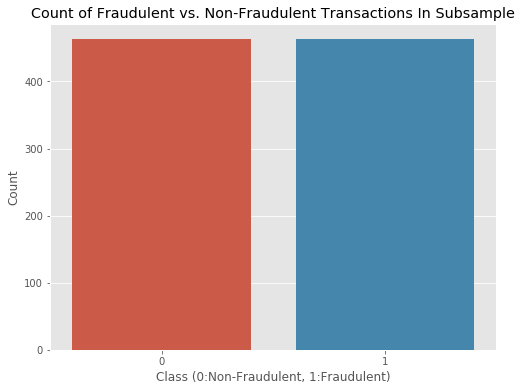

In [27]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [28]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.444
V2,0.495
V3,-0.567
V4,0.711
V5,-0.389
V6,-0.433
V7,-0.481
V8,0.071
V9,-0.557
V10,-0.632


In [29]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.567
V9,-0.557
V10,-0.632
V12,-0.685
V14,-0.748
V16,-0.596
V17,-0.561


In [30]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.711
V11,0.687
Class,1.000


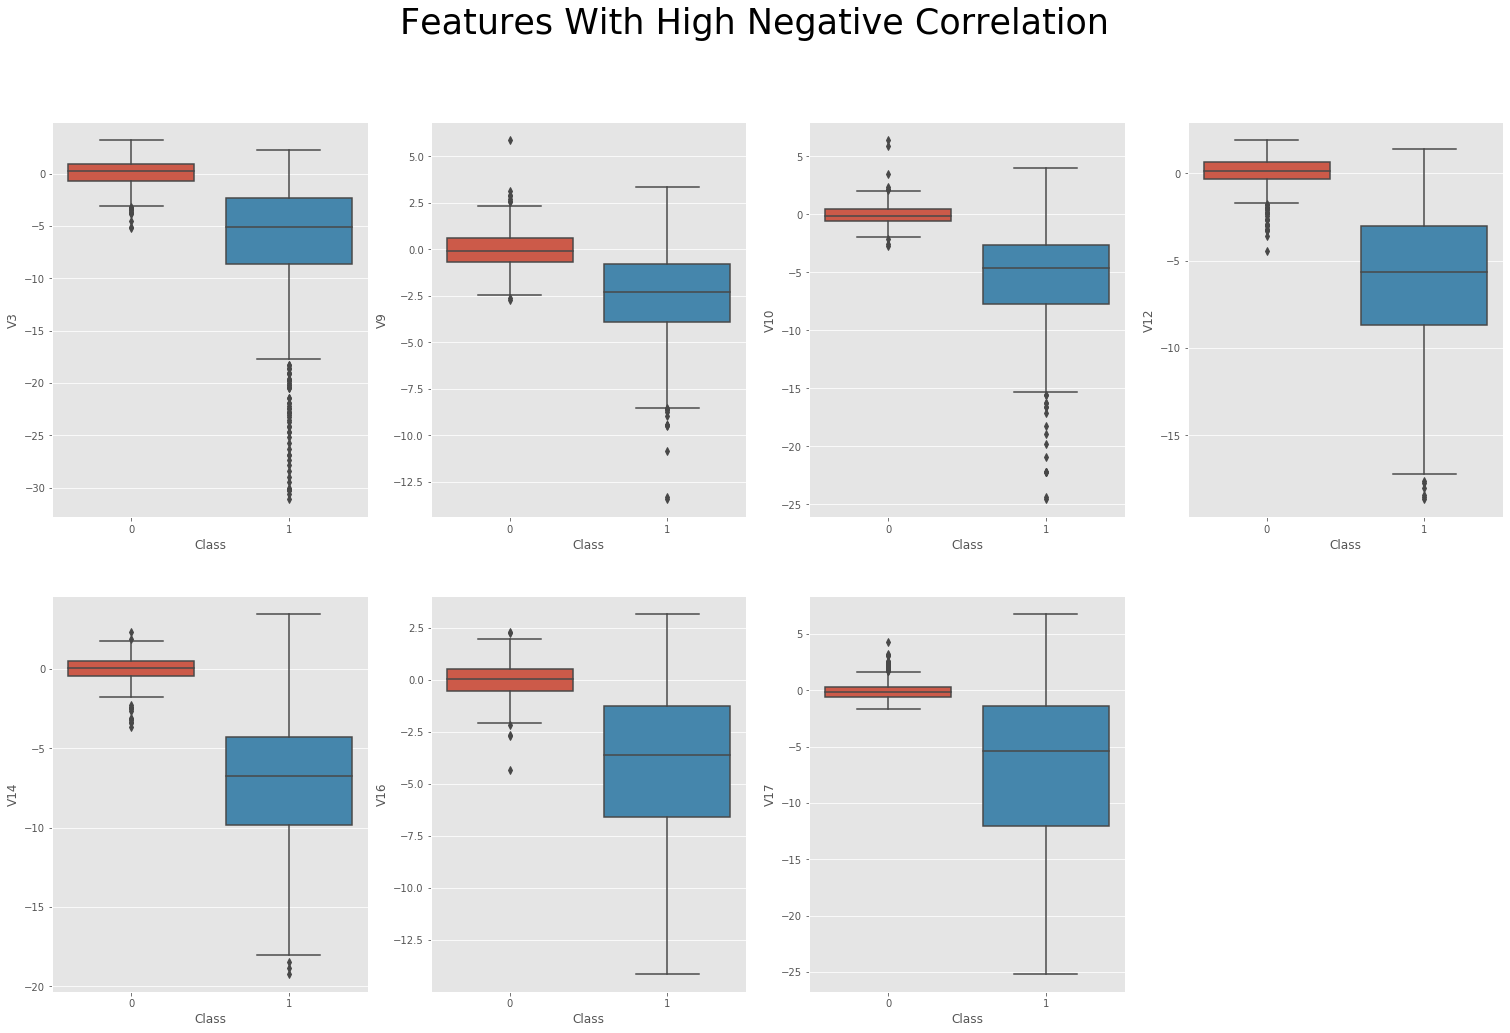

In [31]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

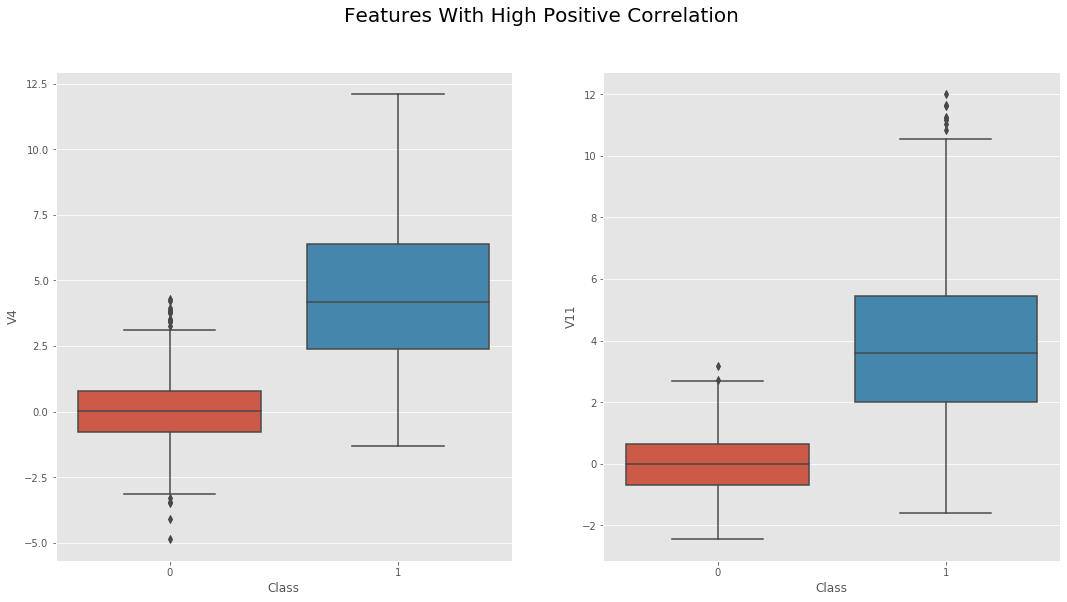

In [32]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

#### Extreme Outlier Removal

In [34]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [35]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 926 transactions by 253 transactions to 673 transactions.


#### Dimensionality Reduction

In [36]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [38]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

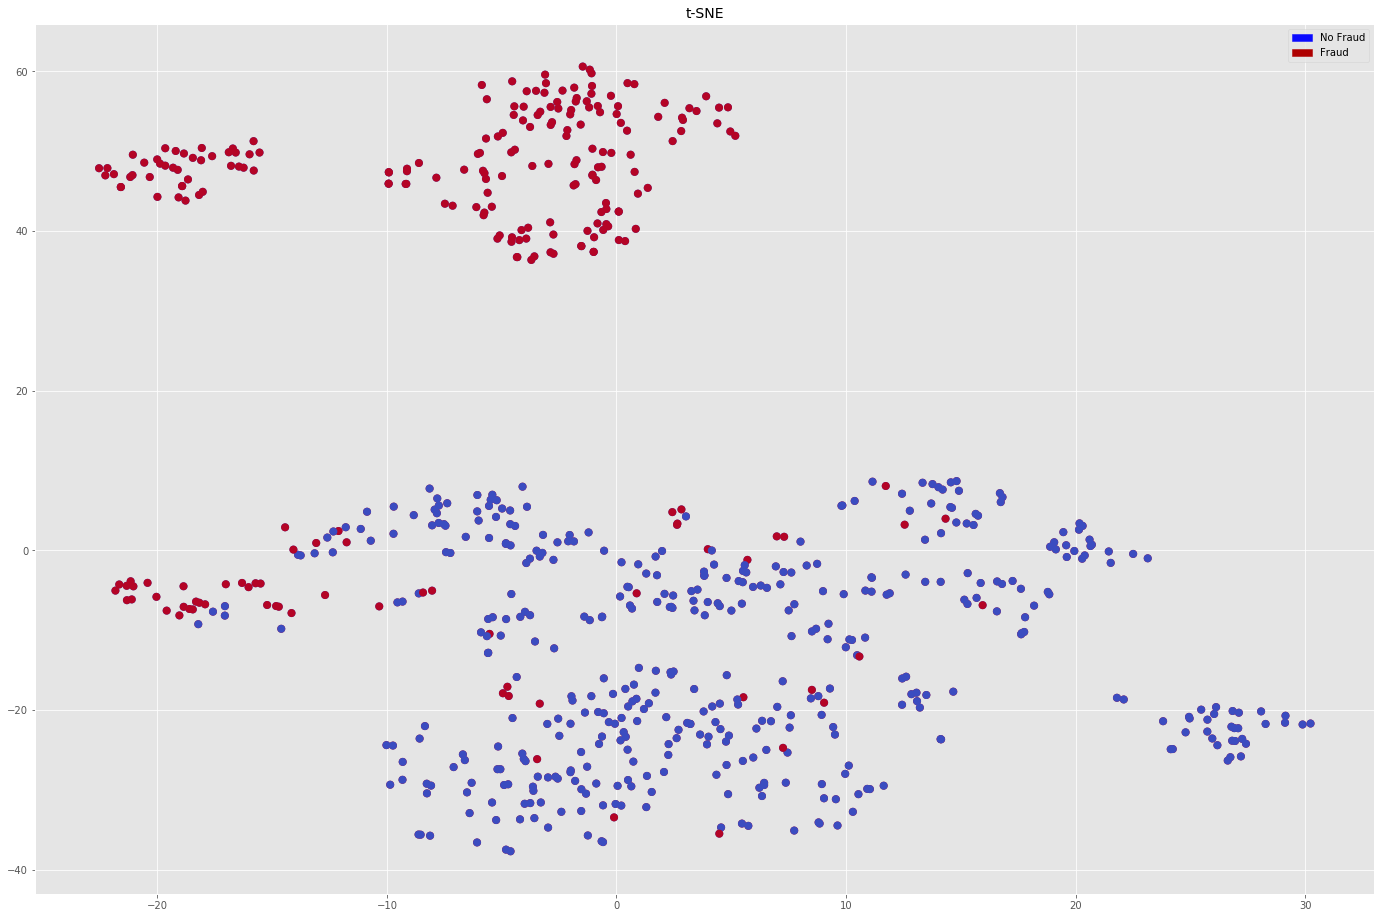

In [39]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

#### Classification Algorithms

In [40]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [41]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [43]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (538, 30) (135, 30) 

Y_shapes:
 Y_train: Y_validation:
 (538,) (135,)


In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.965001 (0.019662)
LDA: 0.969334 (0.014498)
KNN: 0.963697 (0.025218)
CART: 0.896312 (0.029819)
SVM: 0.962916 (0.019531)
XGB: 0.974523 (0.024011)
RF: 0.958153 (0.027256)


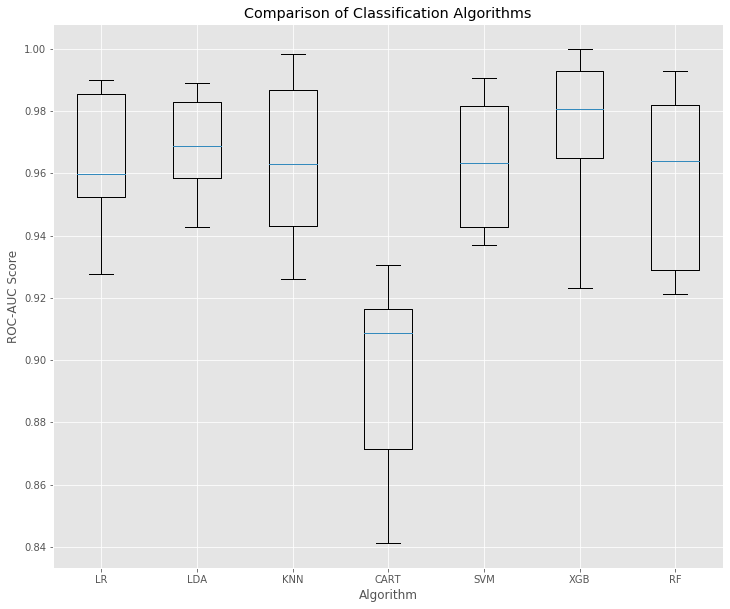

In [46]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()